In [40]:
import pandas as pd
import sys
import sweetviz as sv

from termcolor import cprint

In [41]:
sys.path.append('src/')
import plot as p

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

## Load dataset

In [42]:
# Load data 
df = pd.read_csv('training_data/kc_house_data.csv') 

cprint(f'Shape of the data - {df.shape}', color = 'blue')
df.head()

Shape of the data - (21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

## Data Exploration

#### There are no missing values in the dataset - good!

In [43]:
# are there duplicate rows?

if df['id'].nunique() == df.shape[0]:
    cprint('The dataframe is one row per unique id.', color = 'blue')
else:
    counts_per_id = df.groupby('id').size()
    more_than_one_sale = df[df.id.isin(counts_per_id[counts_per_id > 1].index)]

    # rows with more than one sale with similar id
    cprint(f'There are {more_than_one_sale.shape[0]} houses that were sold more than once in the period of the dataset', 
           color='red')
    
more_than_one_sale.sort_values(by = 'id').head(10)

There are 353 houses that were sold more than once in the period of the dataset


id             date     price  bedrooms  bathrooms  sqft_living  \
2497     1000102  20150422T000000  300000.0         6       3.00         2400   
2496     1000102  20140916T000000  280000.0         6       3.00         2400   
16814    7200179  20141016T000000  150000.0         2       1.00          840   
16815    7200179  20150424T000000  175000.0         2       1.00          840   
11434  109200390  20141020T000000  250000.0         3       1.75         1480   
11433  109200390  20140820T000000  245000.0         3       1.75         1480   
12418  123039336  20141208T000000  244900.0         1       1.00          620   
12417  123039336  20140611T000000  148000.0         1       1.00          620   
7793   251300110  20150114T000000  358000.0         3       2.25         2510   
7792   251300110  20140731T000000  225000.0         3       2.25         2510   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2497       9373     2.0           0     0          3      7        2400   
2496       9373     2.0           0     0          3      7        2400   
16814     12750     1.0           0     0          3      6         840   
16815     12750     1.0           0     0          3      6         840   
11434      3900     1.0           0     0          4      7        1480   
11433      3900     1.0           0     0          4      7        1480   
12418      8261     1.0           0     0          3      5         620   
12417      8261     1.0           0     0          3      5         620   
7793      12013     2.0           0     0          3      8        2510   
7792      12013     2.0           0     0          3      8        2510   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2497               0      1991             0    98002  47.3262 -122.214   
2496               0      1991             0    98002  47.3262 -122.214   
16814              0      1925             0    98055  47.4840 -122.211   
16815              0      1925             0    98055  47.4840 -122.211   
11434              0      1980             0    98023  47.2977 -122.367   
11433              0      1980             0    98023  47.2977 -122.367   
12418              0      1939             0    98106  47.5138 -122.364   
12417              0      1939             0    98106  47.5138 -122.364   
7793               0      1988             0    98003  47.3473 -122.314   
7792               0      1988             0    98003  47.3473 -122.314   

       sqft_living15  sqft_lot15  
2497            2060        7316  
2496            2060        7316  
16814           1480        6969  
16815           1480        6969  
11434           1830        6956  
11433           1830        6956  
12418           1180        8244  
12417           1180        8244  
7793            1870        8017  
7792            1870        8017

#### We could either pick a random one from the multiple sales or the latest one. Since those houses are just a few, it shouldn't matter much. We will select the latest ones.

In [44]:
# sorting dataframe
df.sort_values(['id', 'price'], inplace = True)
 
# dropping duplicate rows keeping latest ones
df.drop_duplicates(subset = 'id', keep = 'last', inplace = True)
 
# let's verify if all duplicate ids are removed
counts_per_id = df.groupby('id').size()
if df[df.id.isin(counts_per_id[counts_per_id > 1].index)].shape[0] == 0:
    cprint(f'All duplicate ids removed with the updated df shape - {df.shape}', color='blue')


All duplicate ids removed with the updated df shape - (21436, 21)


### Let's look at the distribution for the target variable.

In [49]:
p.generate_box_plot(
    df,
    'price'
)

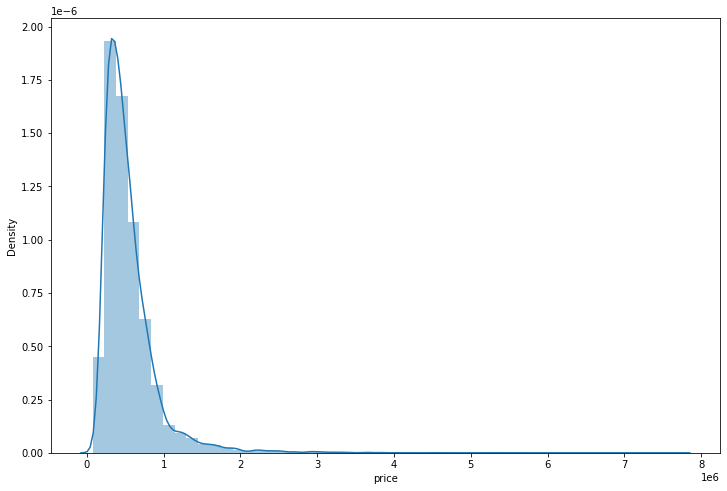

In [7]:
p.generate_dist_plot(
    df,
    'price'
)

#### There are obvious outliers. Let's investigate

In [8]:
# We use IQR to identify potential outliers 

stats = df['price'].describe()
IQR = stats['75%'] - stats['25%']
upper_bound = stats['75%'] + 1.5 * IQR
lower_bound = stats['25%'] - 1.5 * IQR

cprint(f'The upper and lower bounds of possible outliers:, {lower_bound}, {upper_bound}', color = 'red')

The upper and lower bounds of possible outliers:, -155335.0, 1125201.0


#### The lower bound is negative and there aren't any negative values in the price column so let's investigate the houses with prices above the upper bound.

In [9]:
# examine the outliers above the upper_bound
df[df['price'] > upper_bound].shape

(1143, 21)

#### There are 1143 houses that are above the upper bound on price. Let's investigate if there is something unusual going on. It would make sense for houses to be pricier if their descritpion seems worth it. Like for eg: 'sqft_living'

In [10]:
outliers_above_upper = df[df['price'] > upper_bound]

# let's look at houses with high prices but below avg sqft_living
outliers_above_upper[outliers_above_upper['sqft_living']<2000].shape

(17, 21)

In [11]:
# smaller pricy houses but with extraordinary condition?
outliers_above_upper[(outliers_above_upper['sqft_living']<2000) &\
                     (outliers_above_upper['condition']>3)].shape

(8, 21)

#### So, looks like there are 8 houses that aren't too big on their area but were still sold for prices that are above the upper bound. And that their condition was extraordinary. We will leave them be for now.

### Let's look at how some of the numerical features relate with the target variable.

                                             |                                             | [  0%]   00:00 ->…


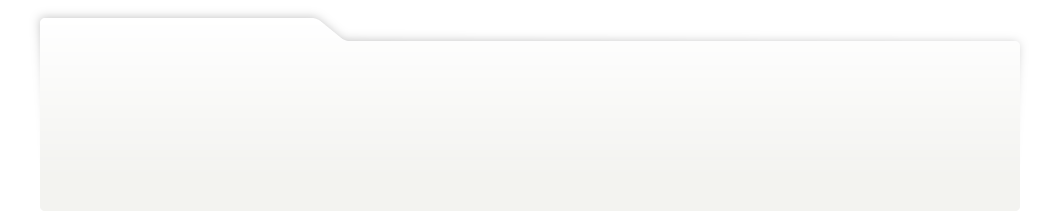
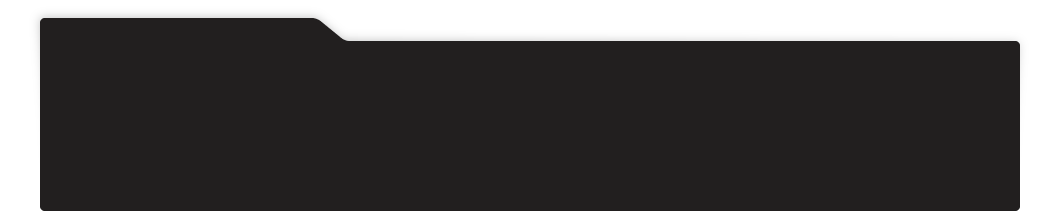
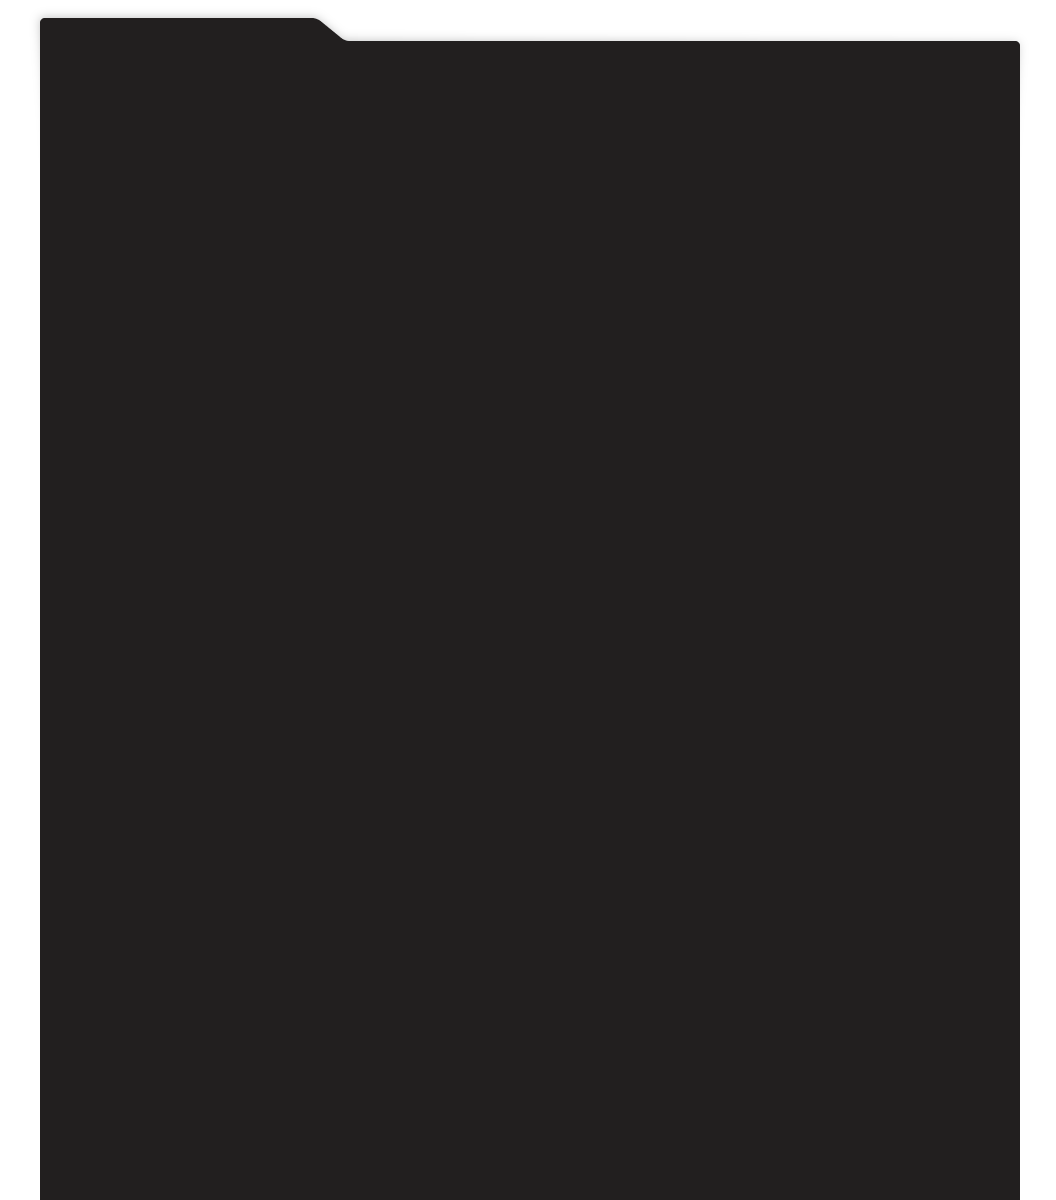
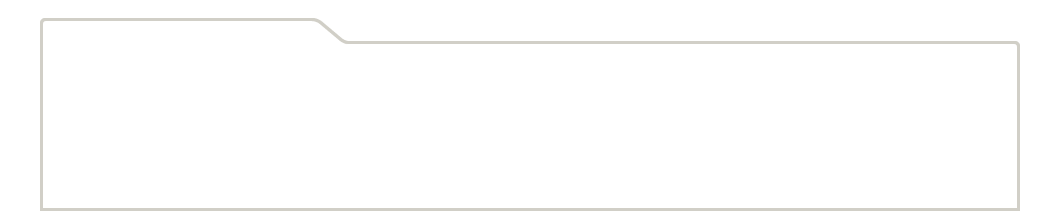
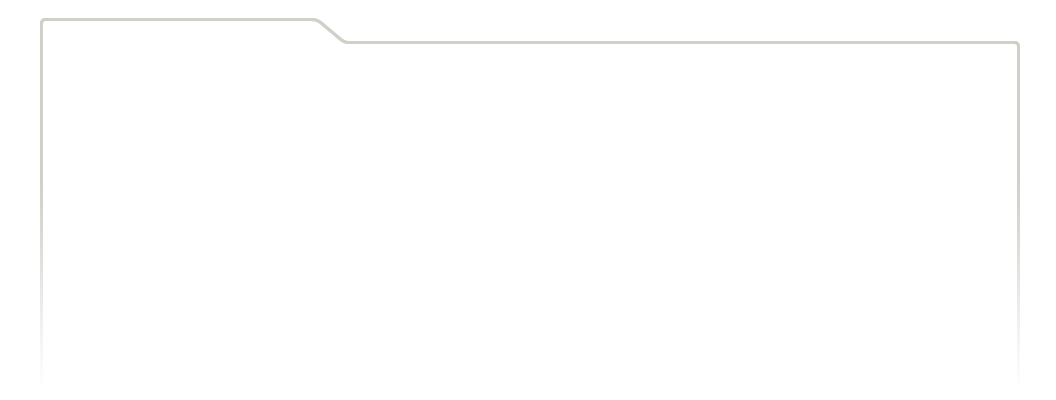
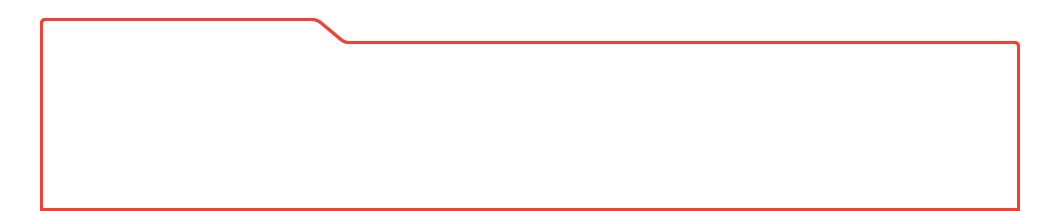
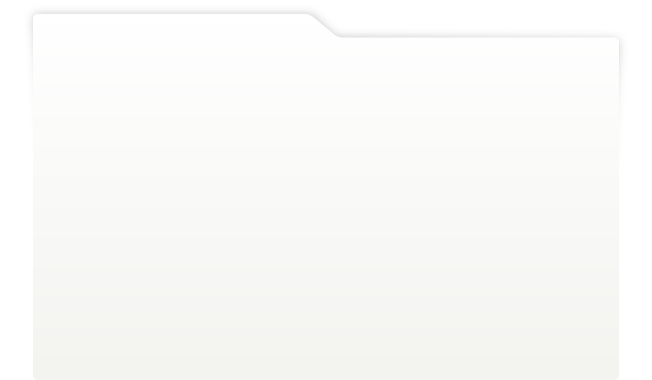
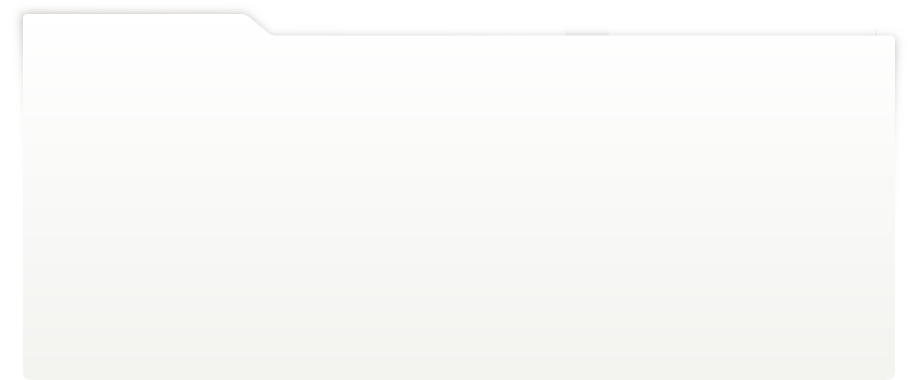
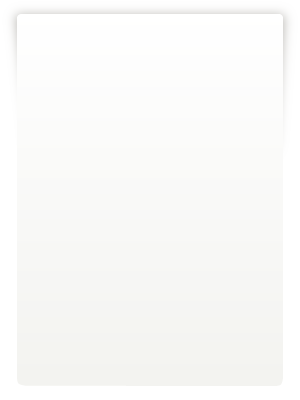
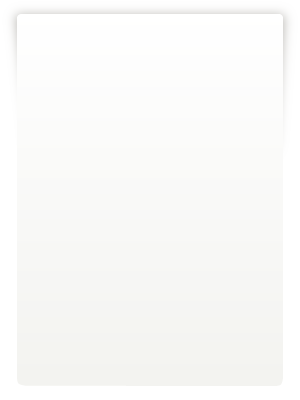
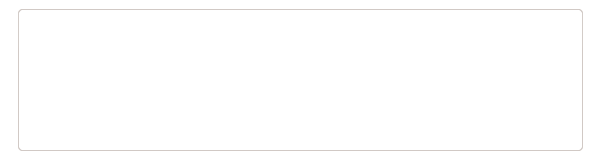
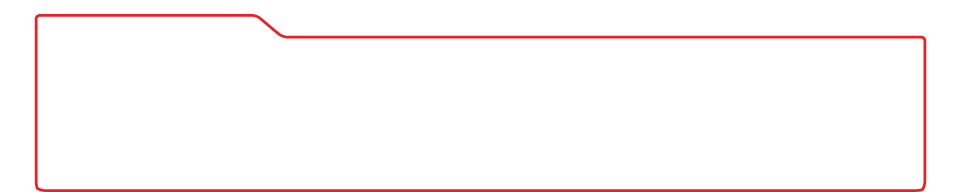
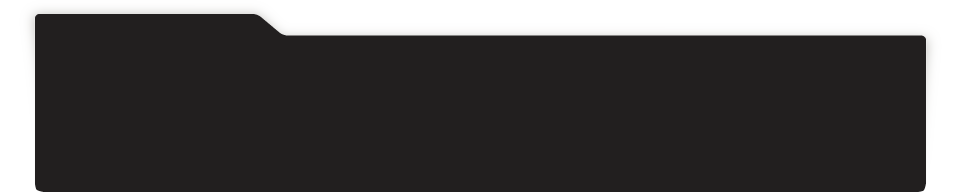
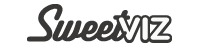
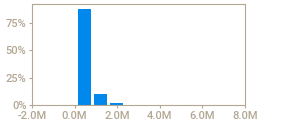
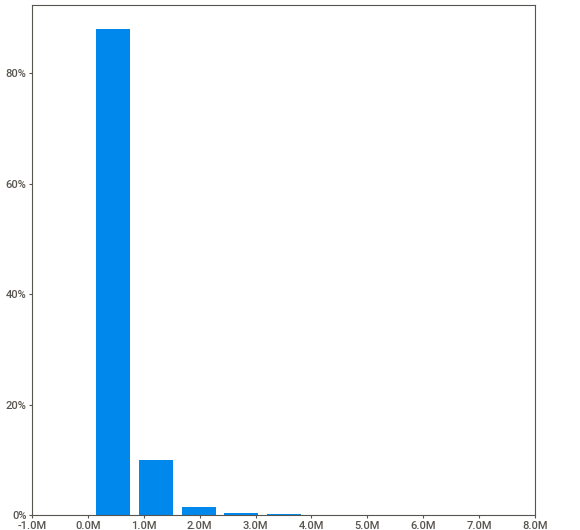
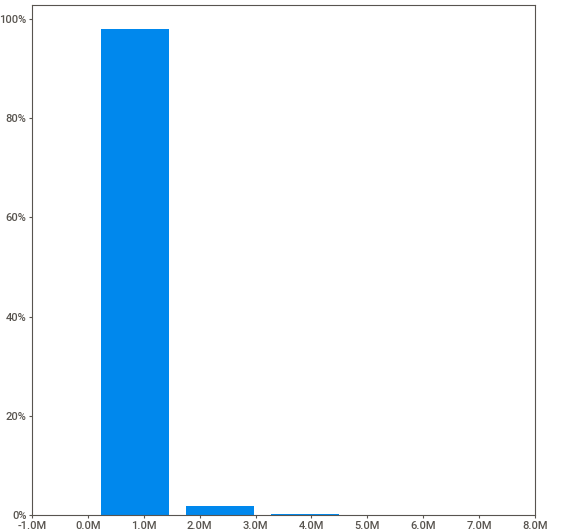
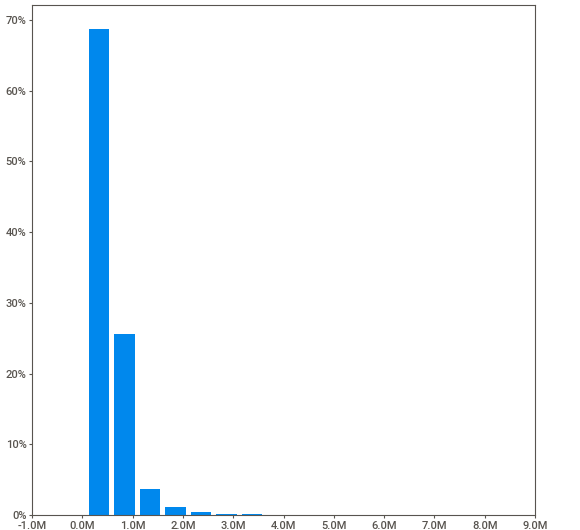
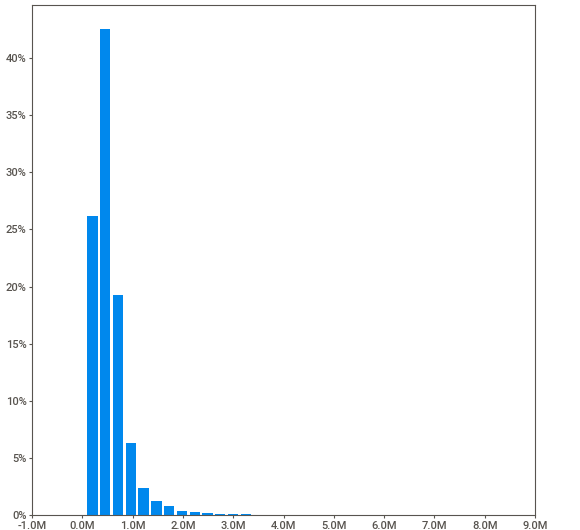
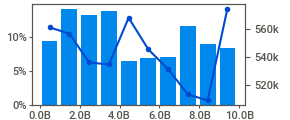
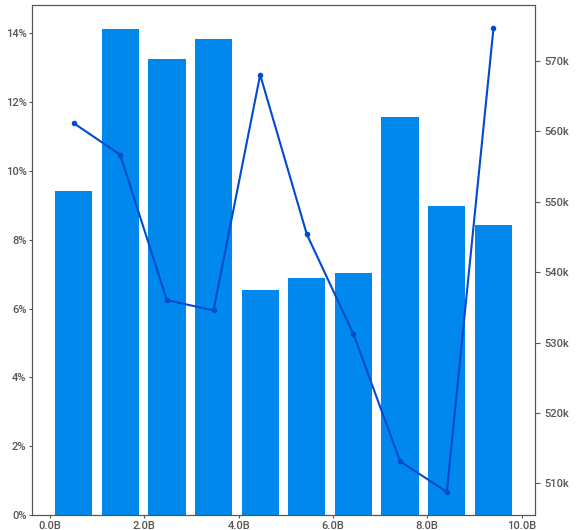
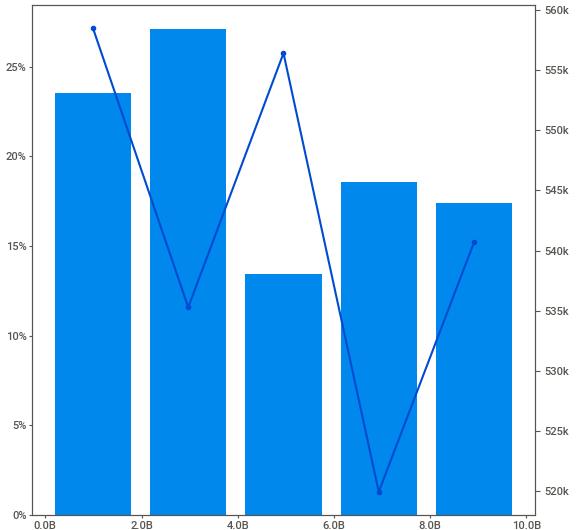
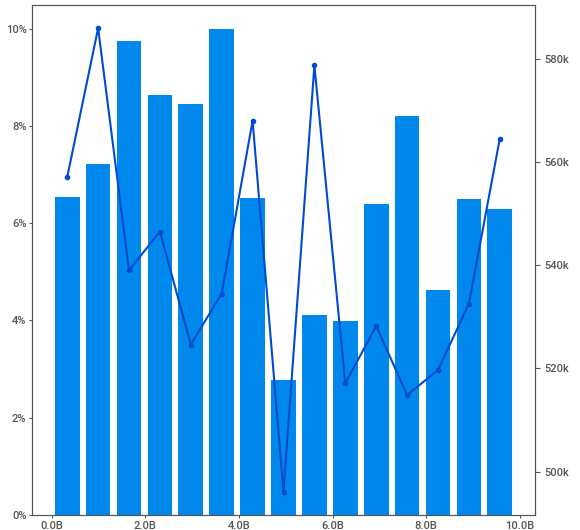
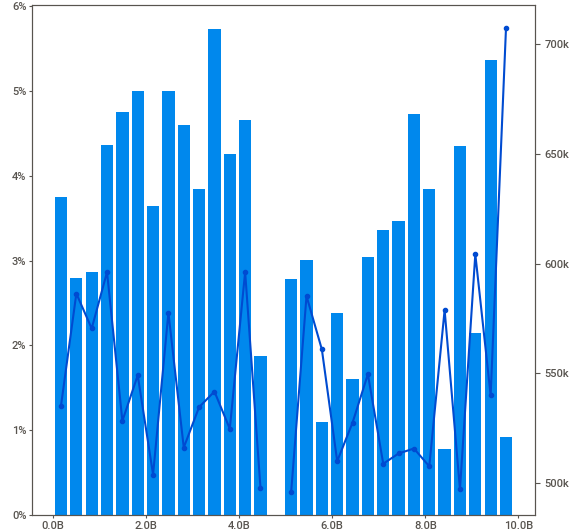
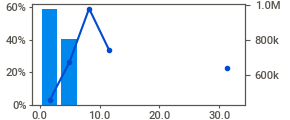
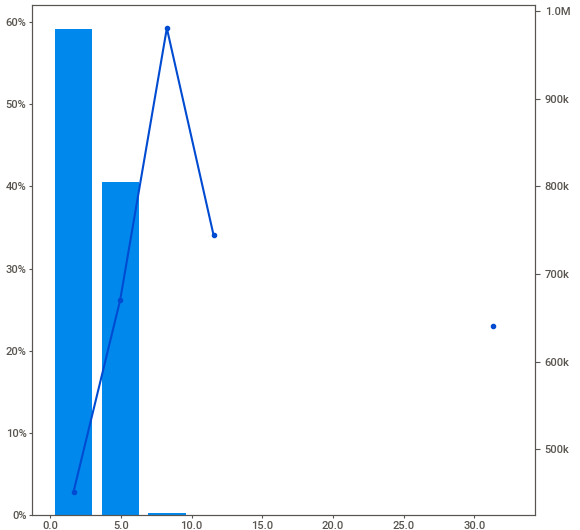
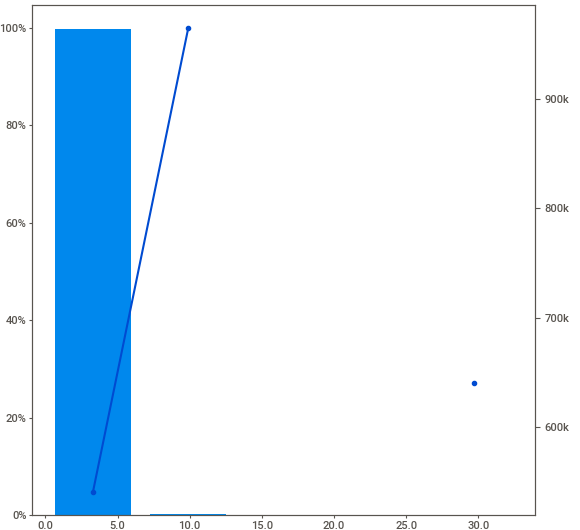
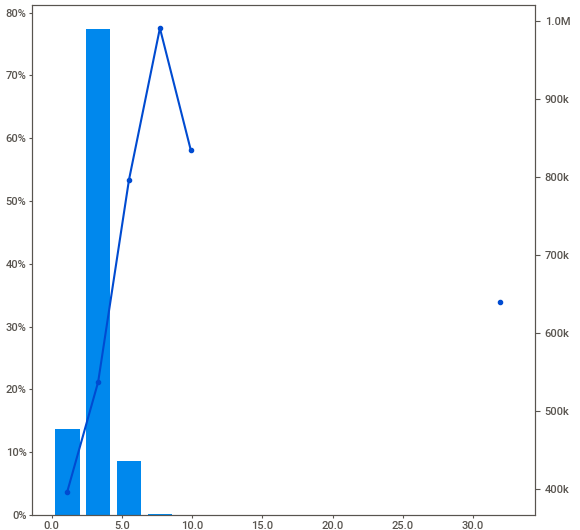
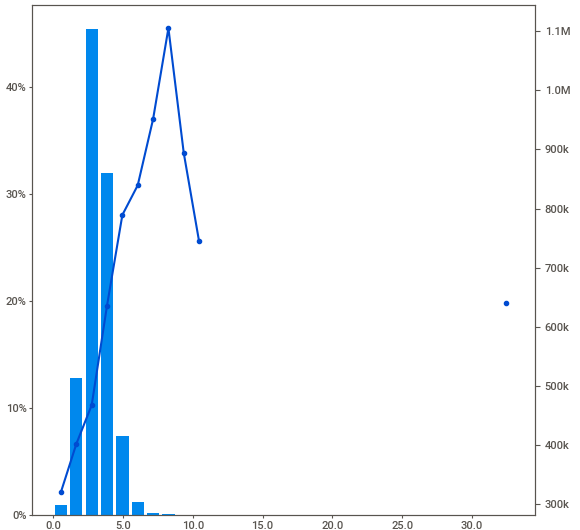
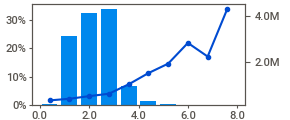
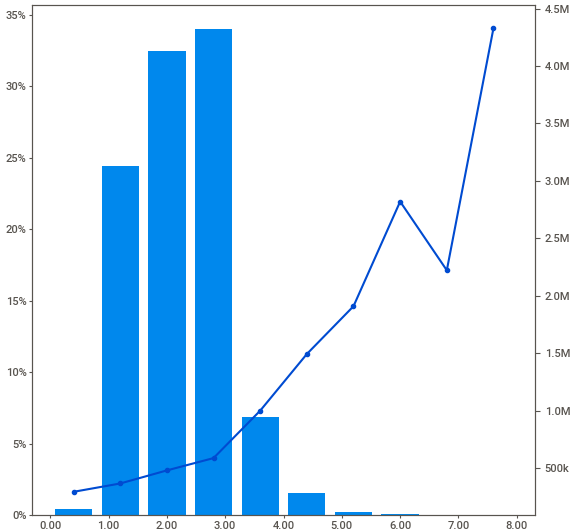
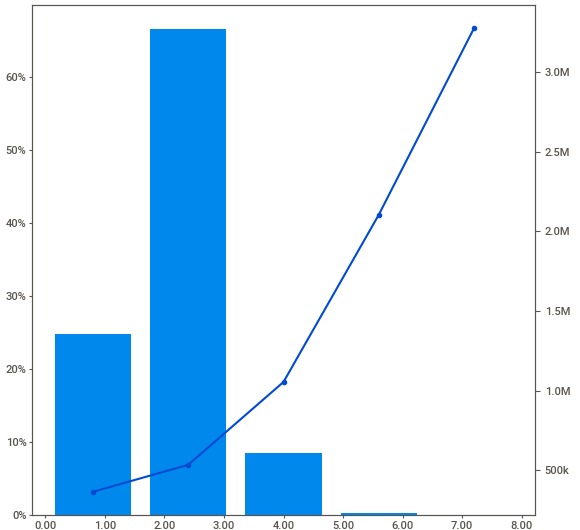
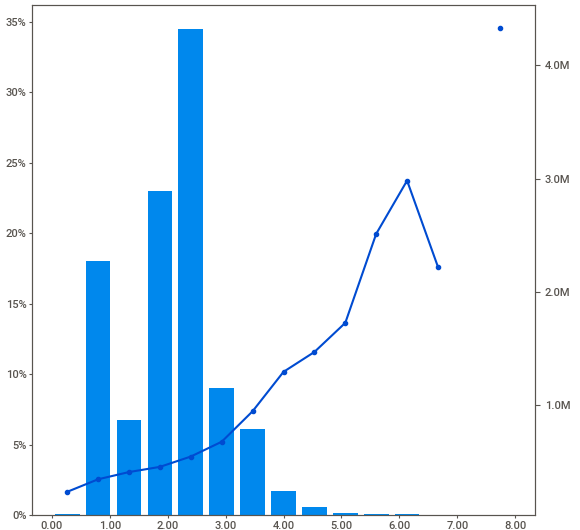
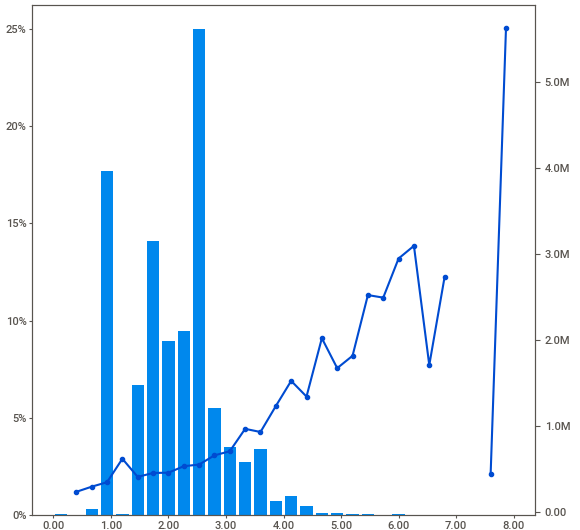
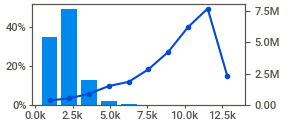
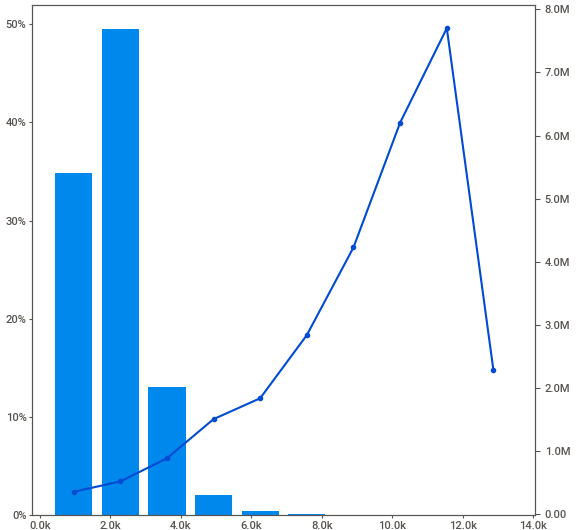
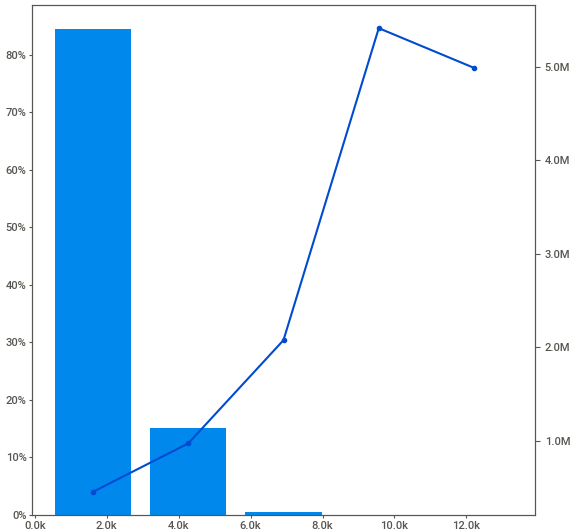
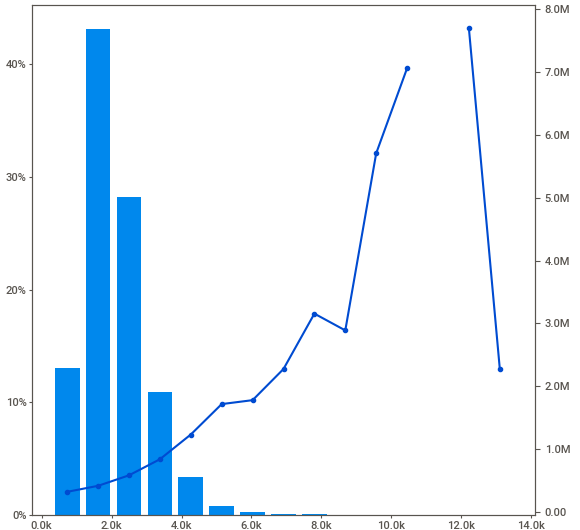
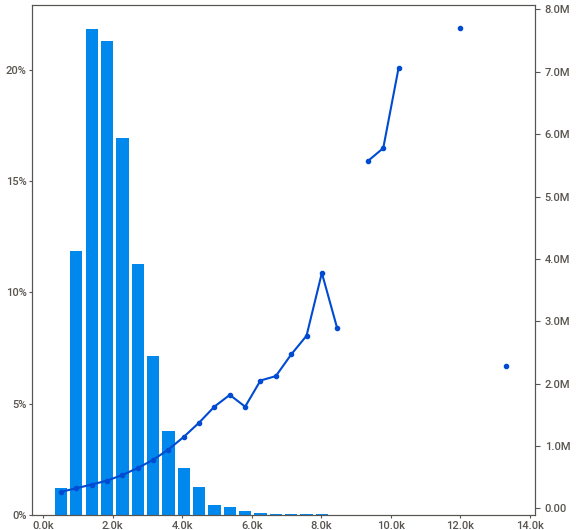
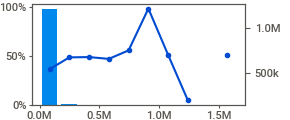
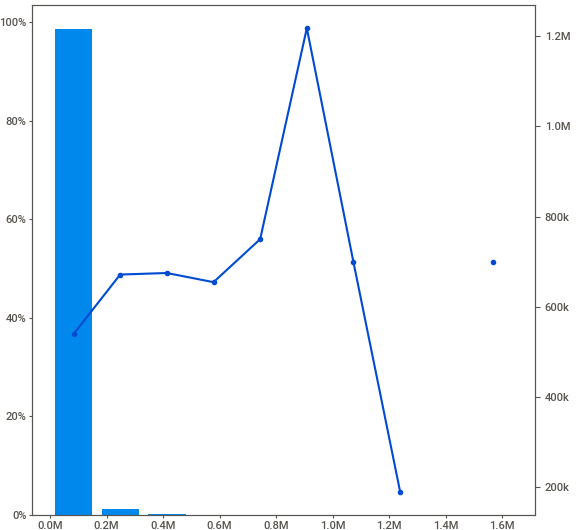
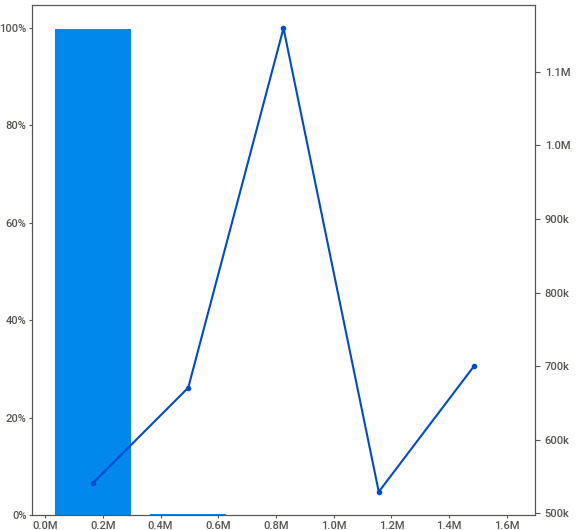
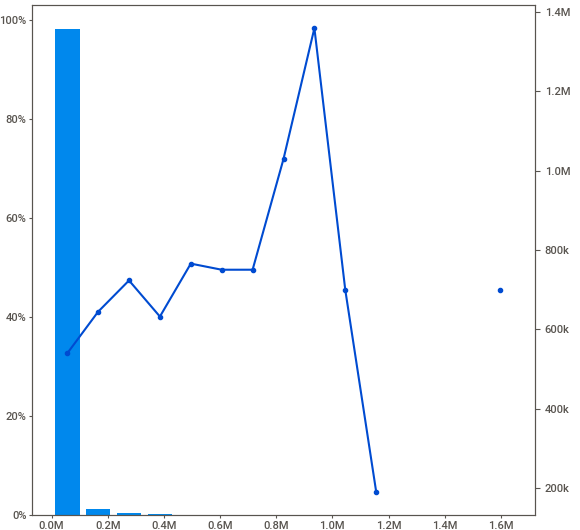
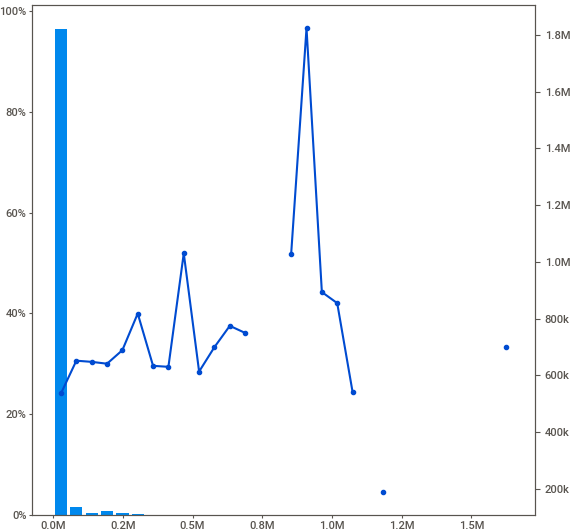
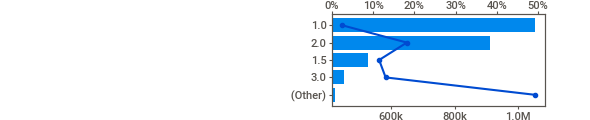
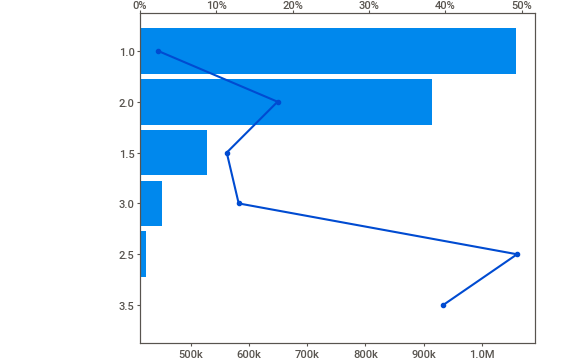
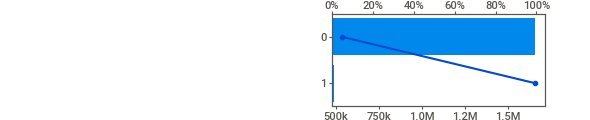
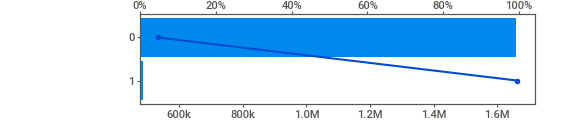
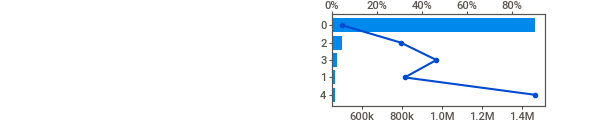
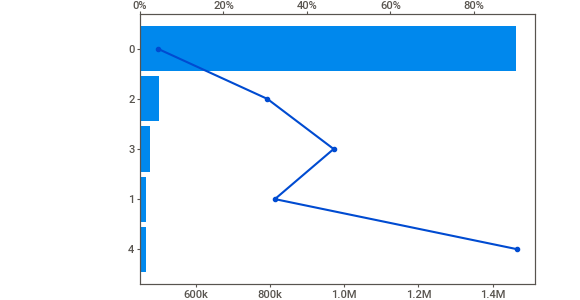
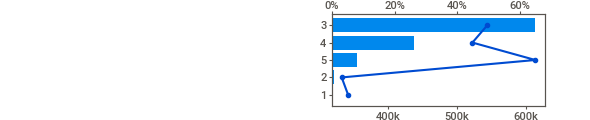
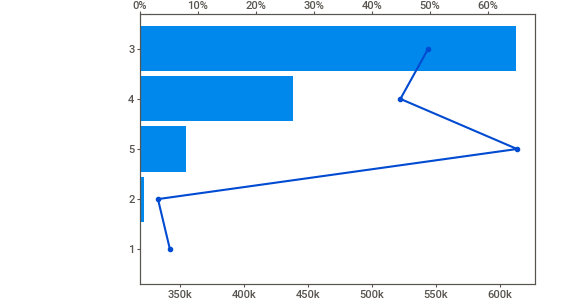
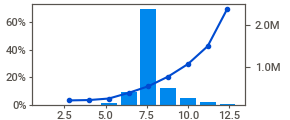
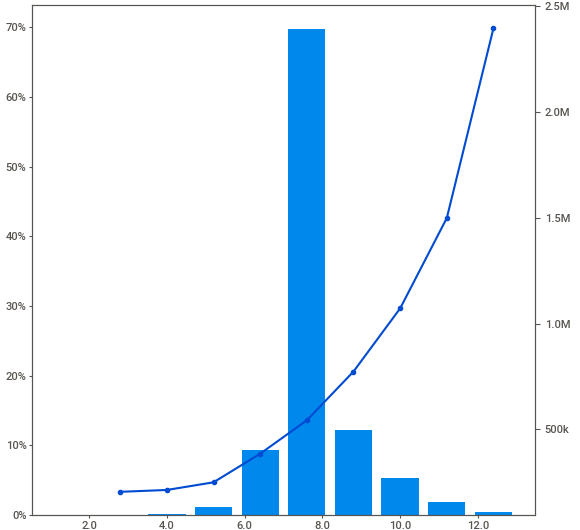
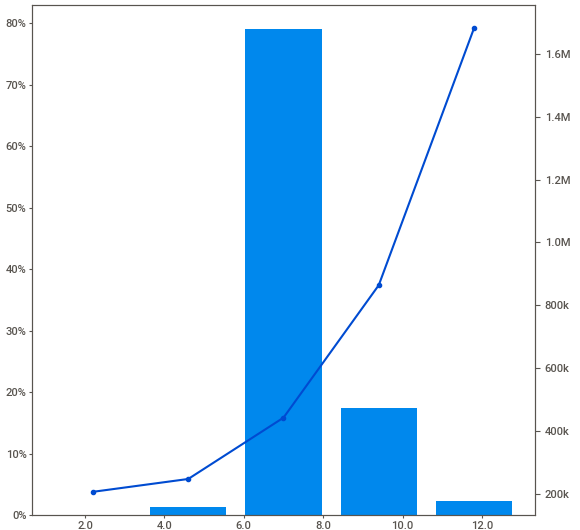
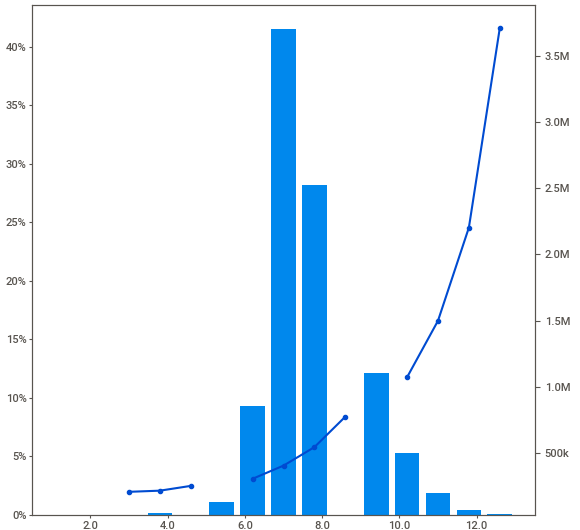
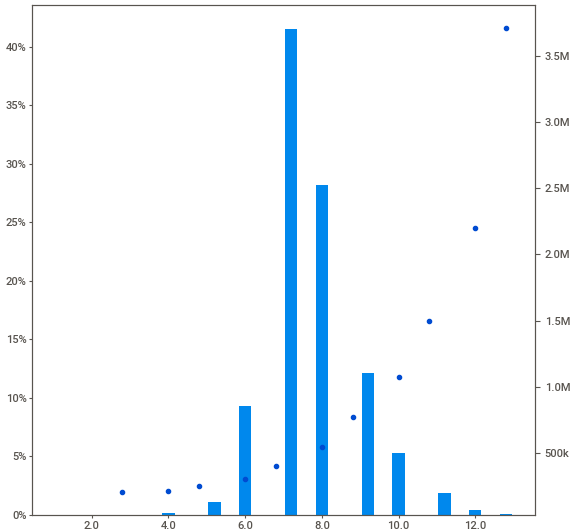
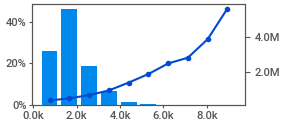
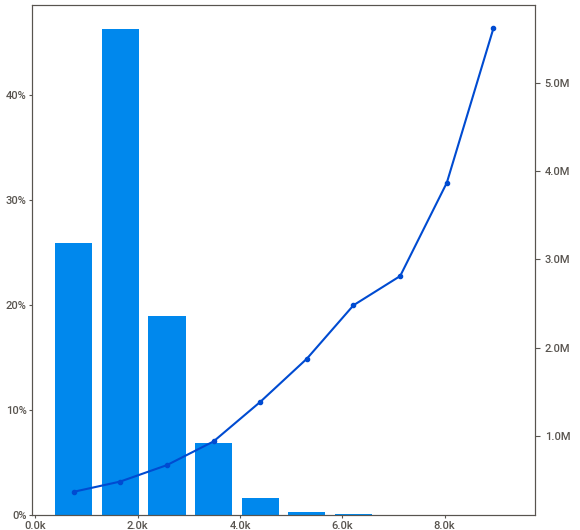
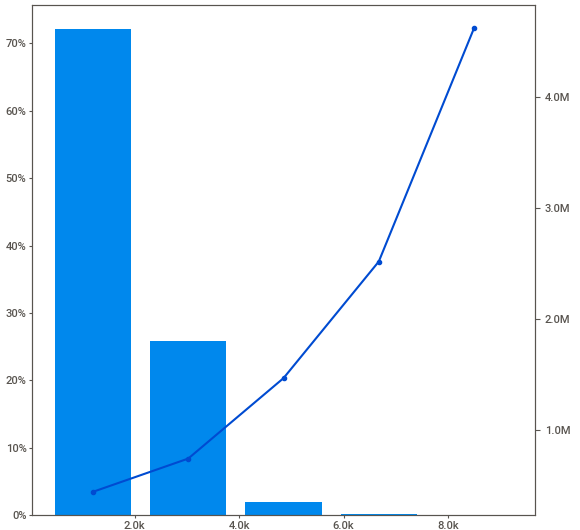
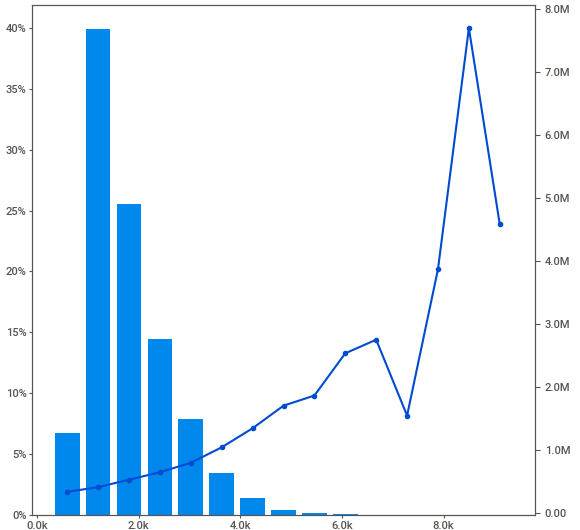
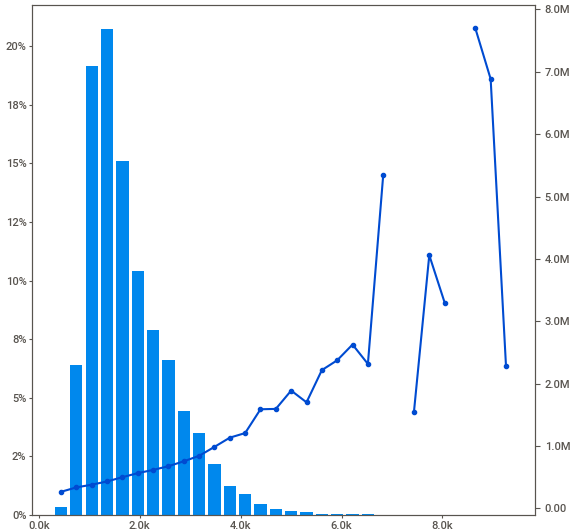
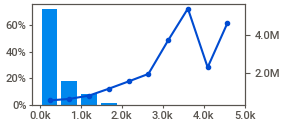
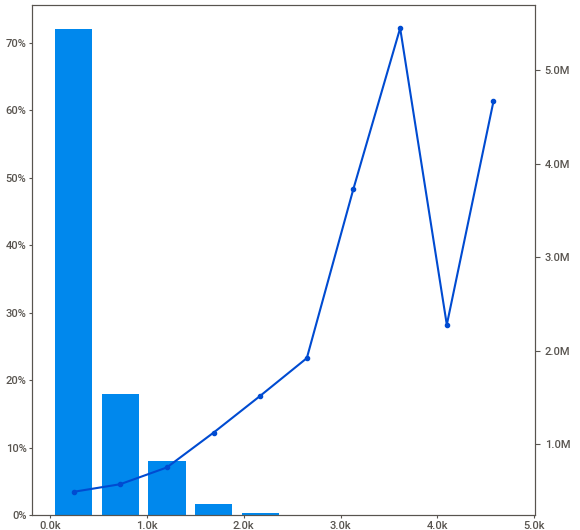
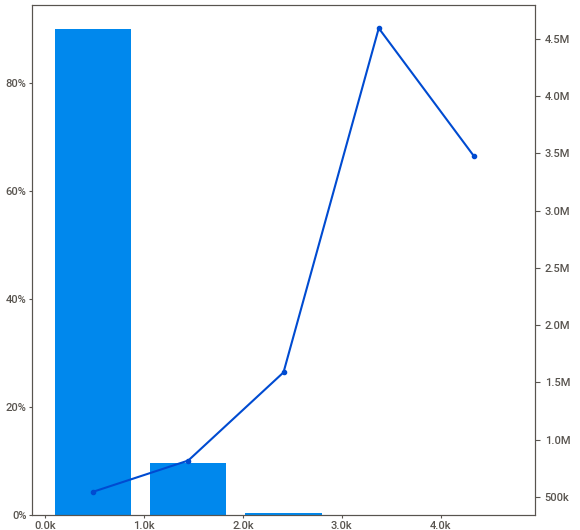
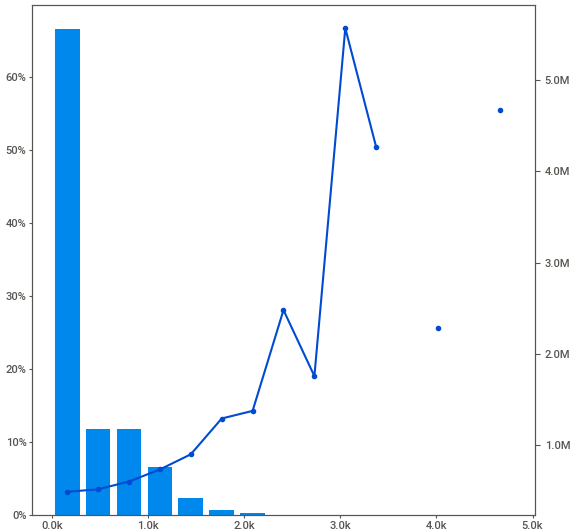
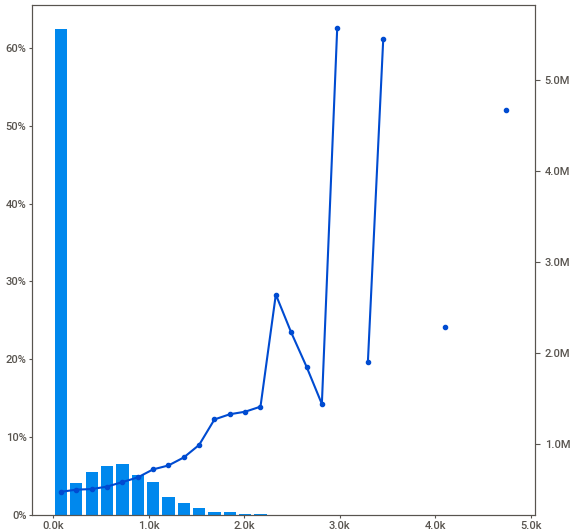
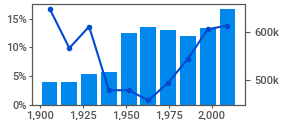
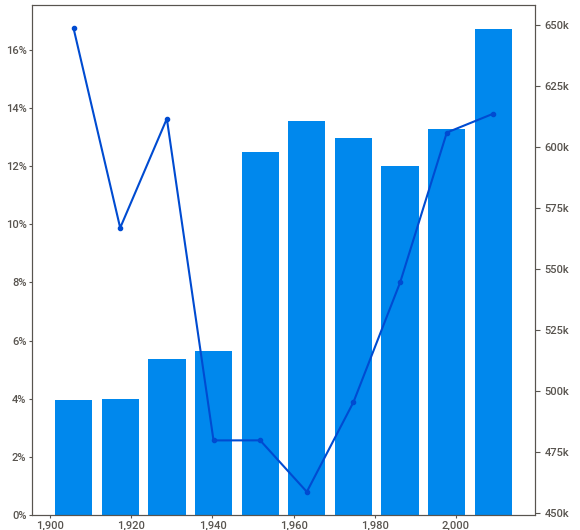
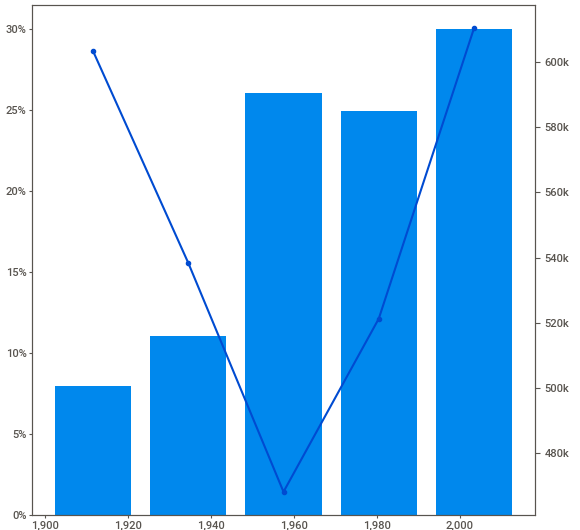
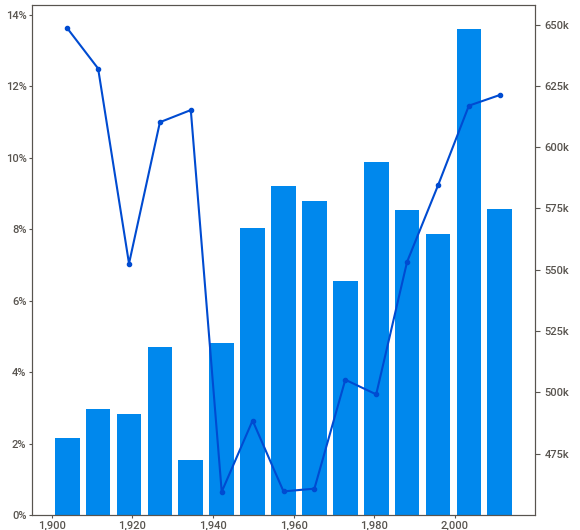
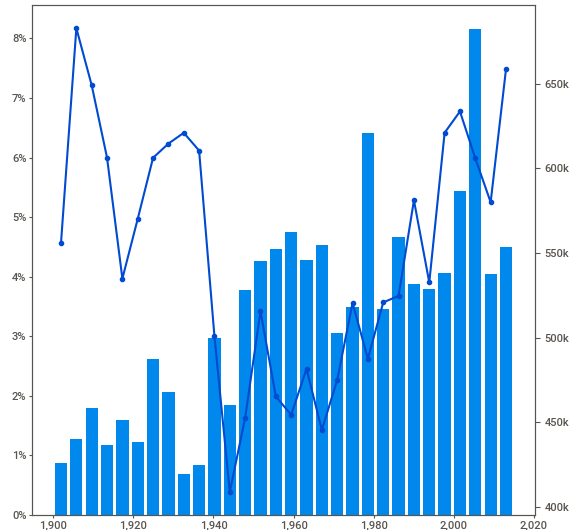
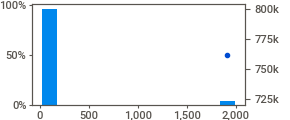
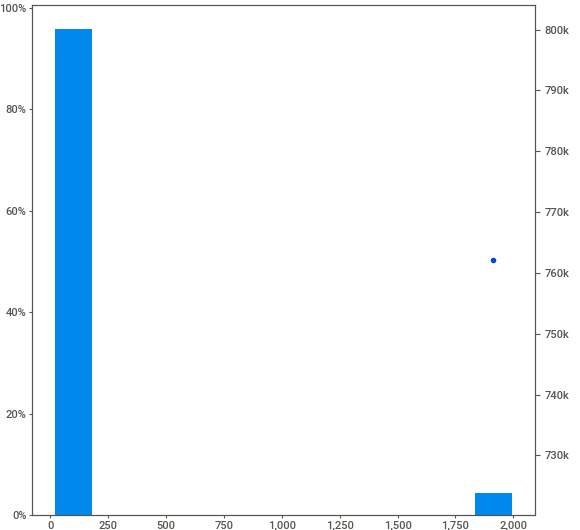
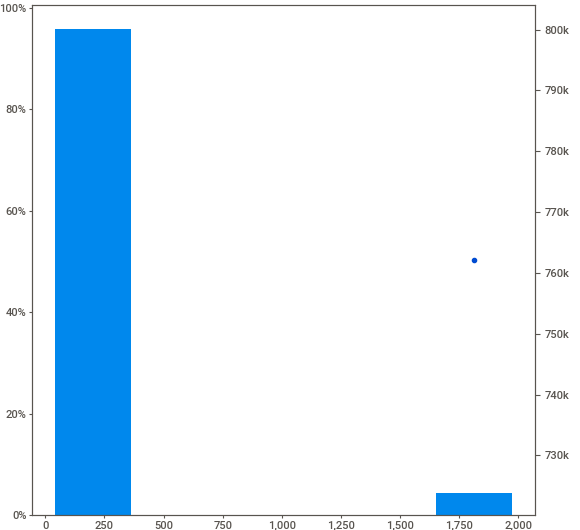
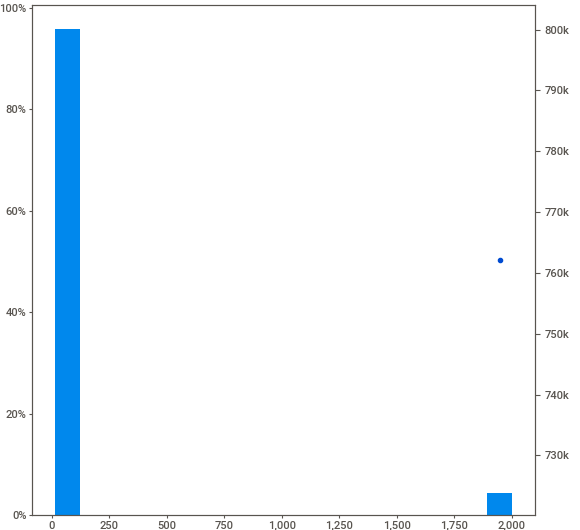
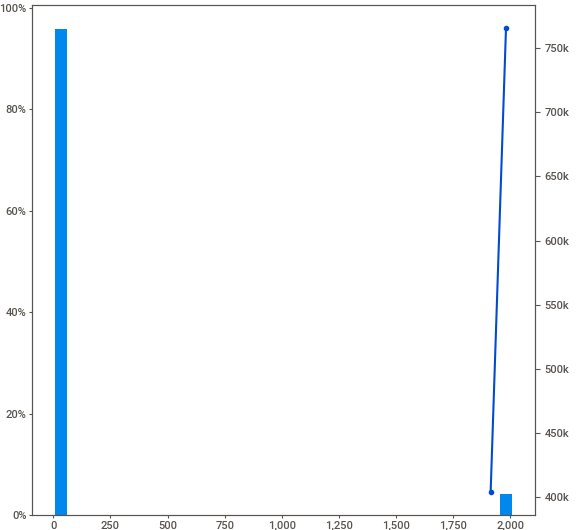
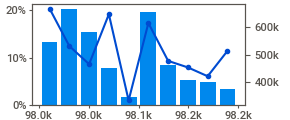
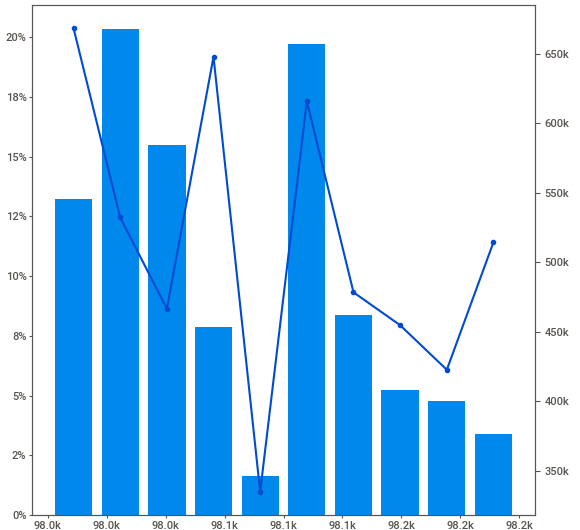
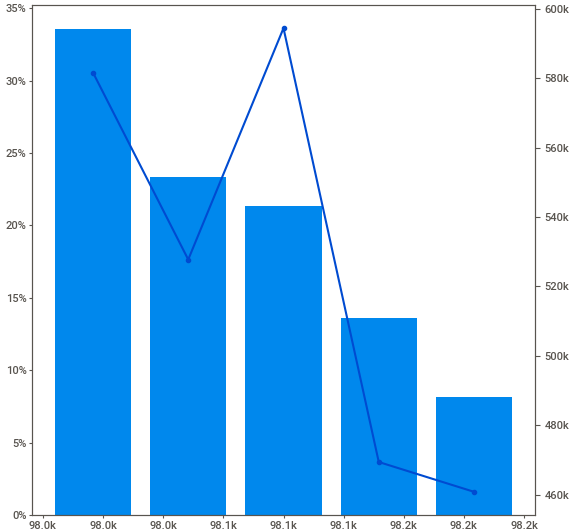
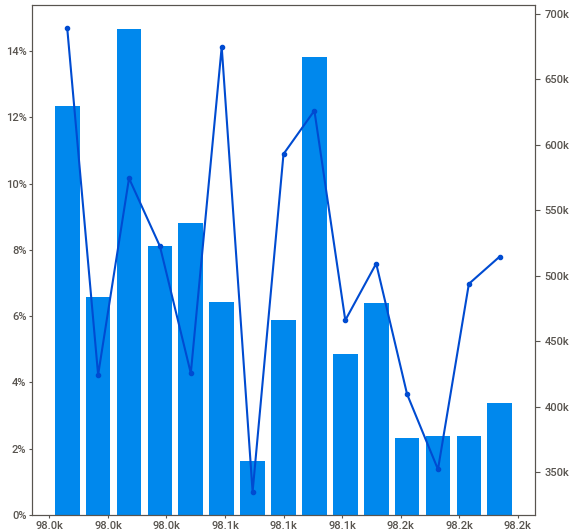
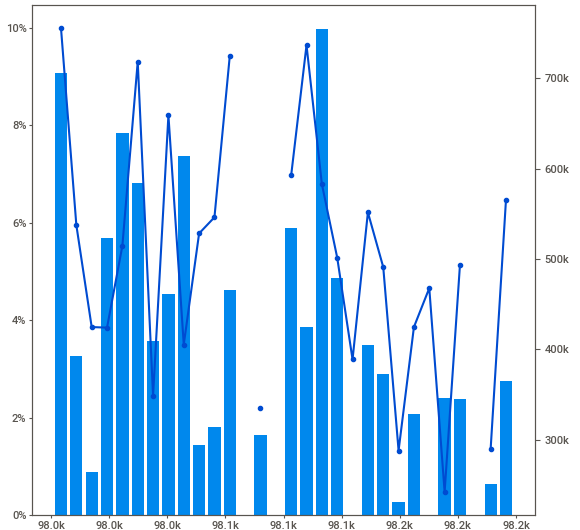
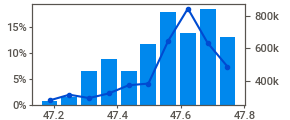
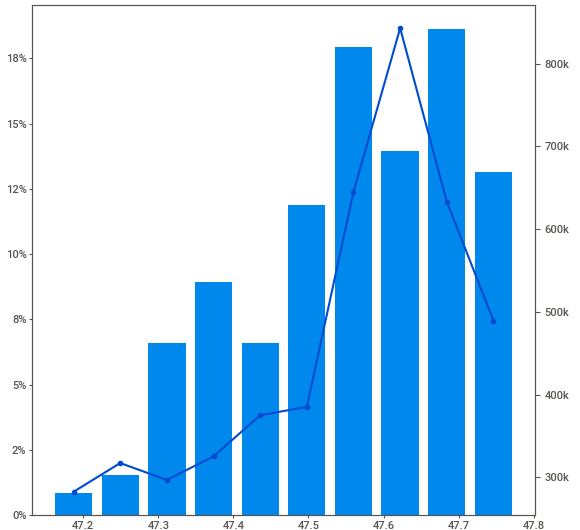
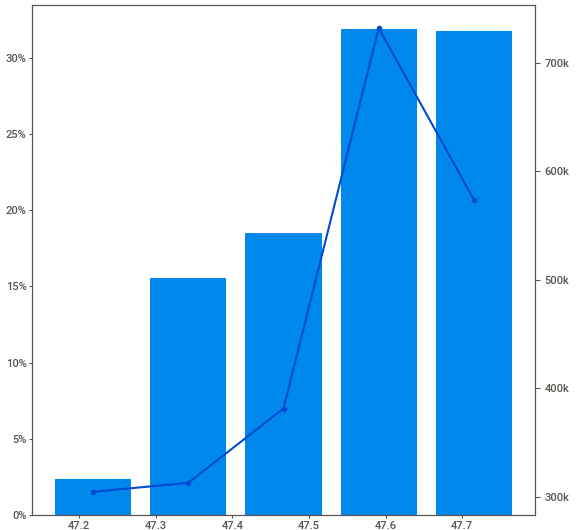
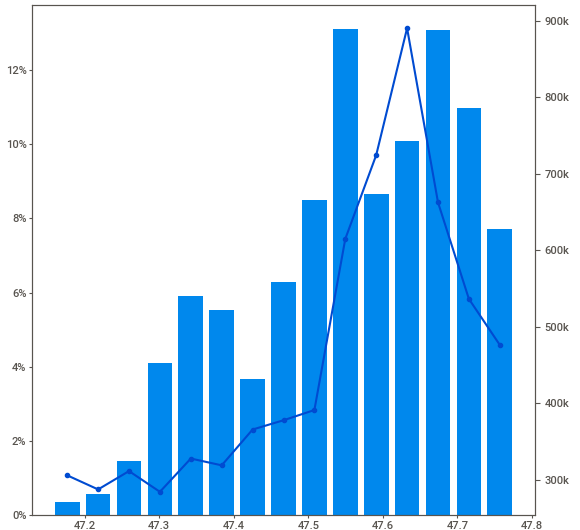
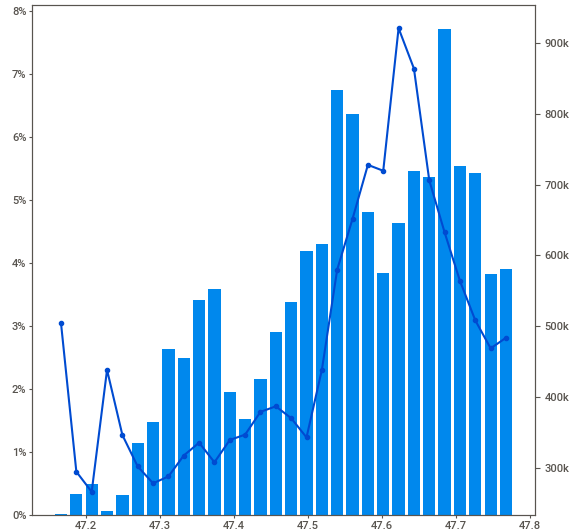
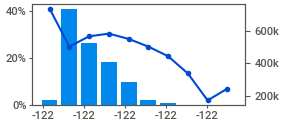
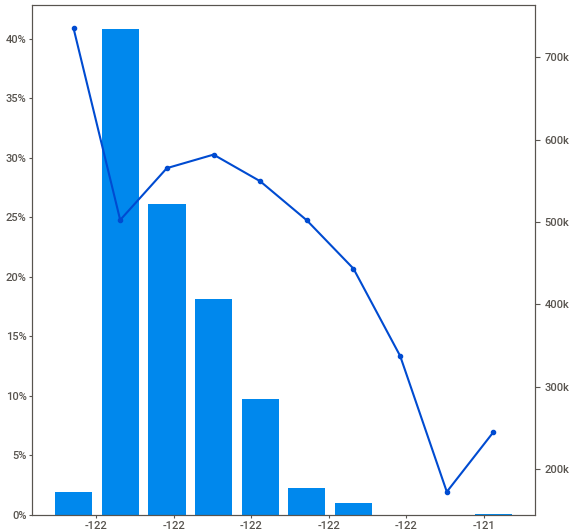
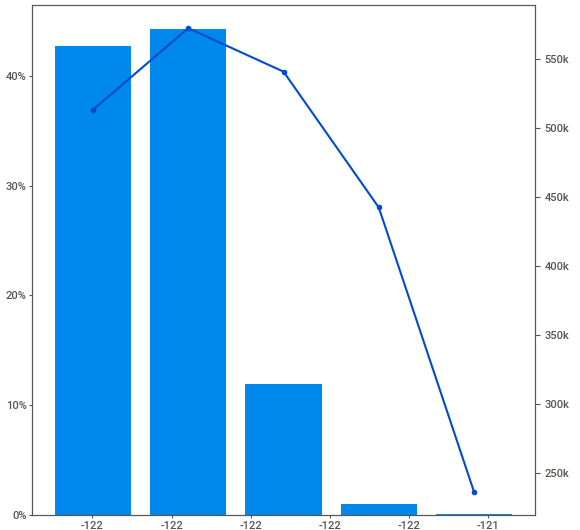
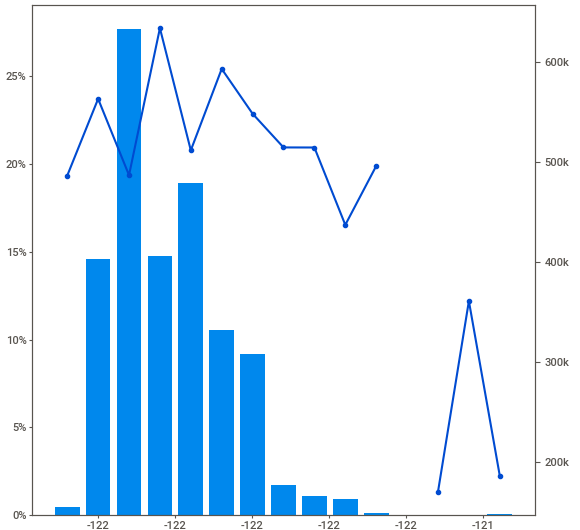
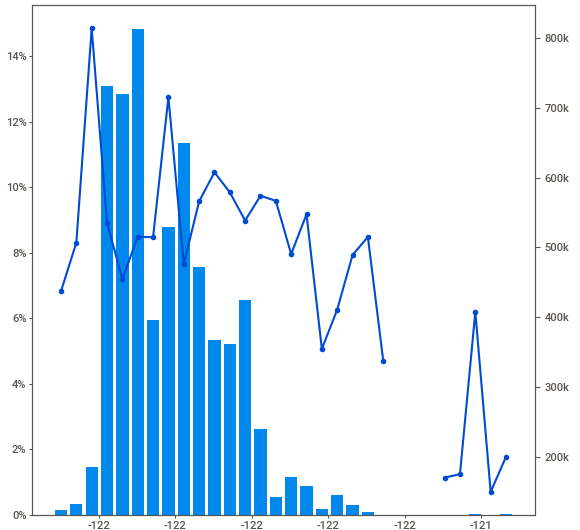
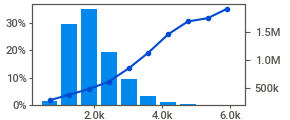
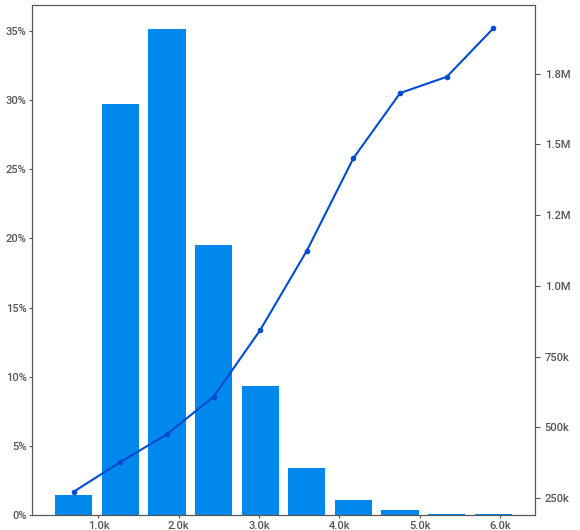
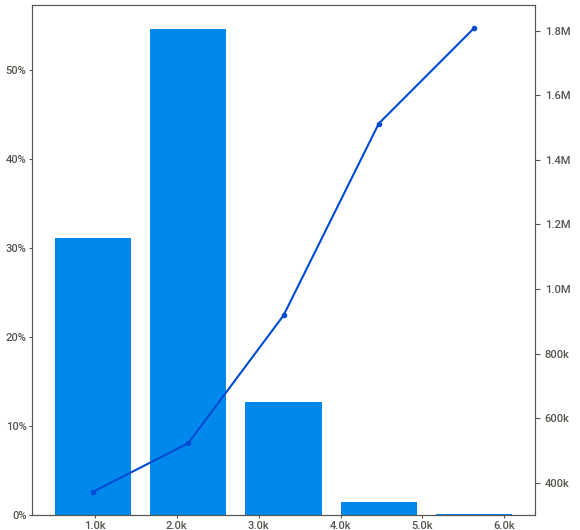
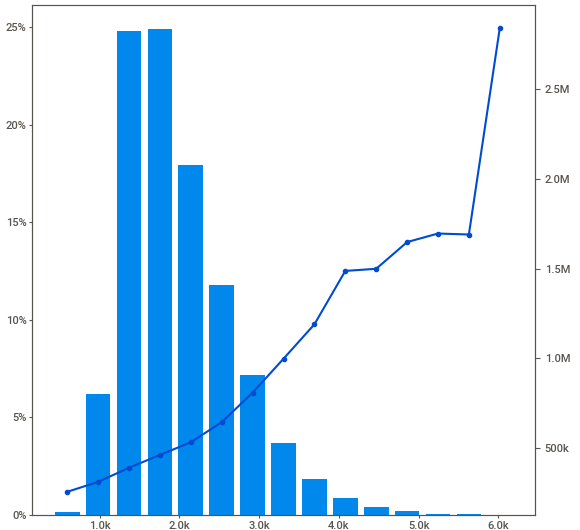
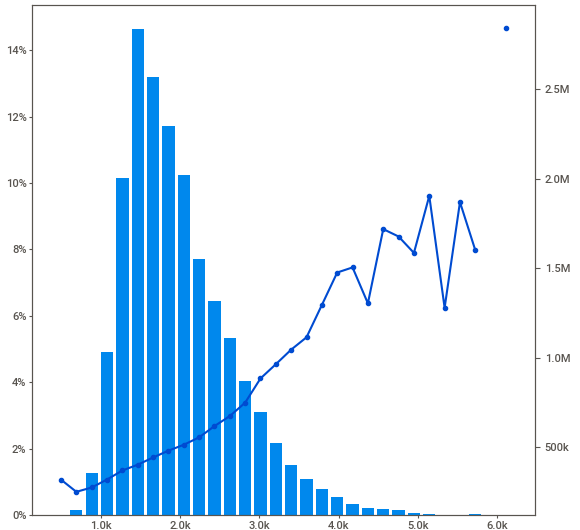
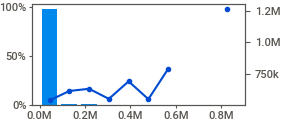
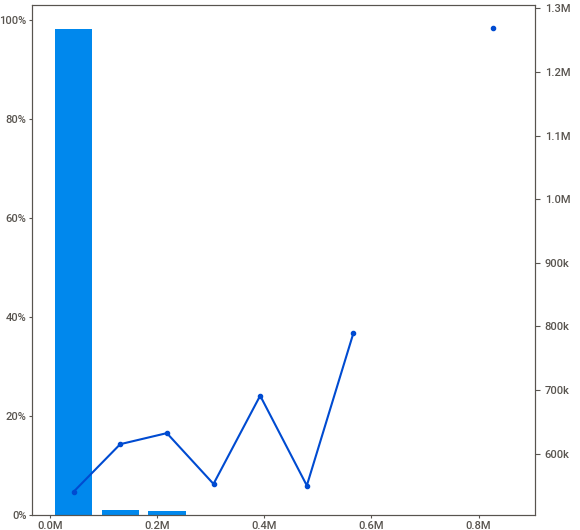
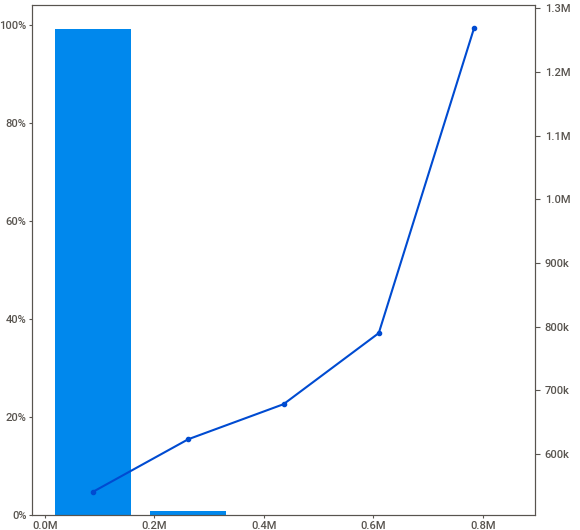
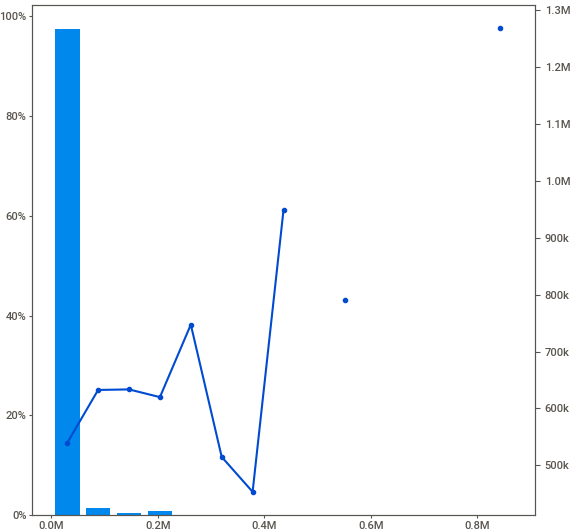
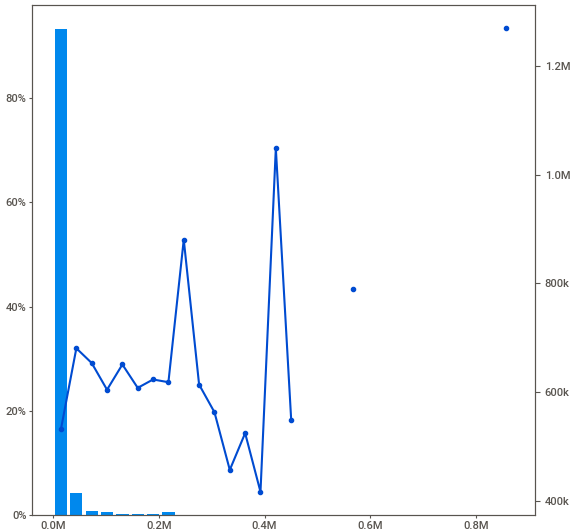
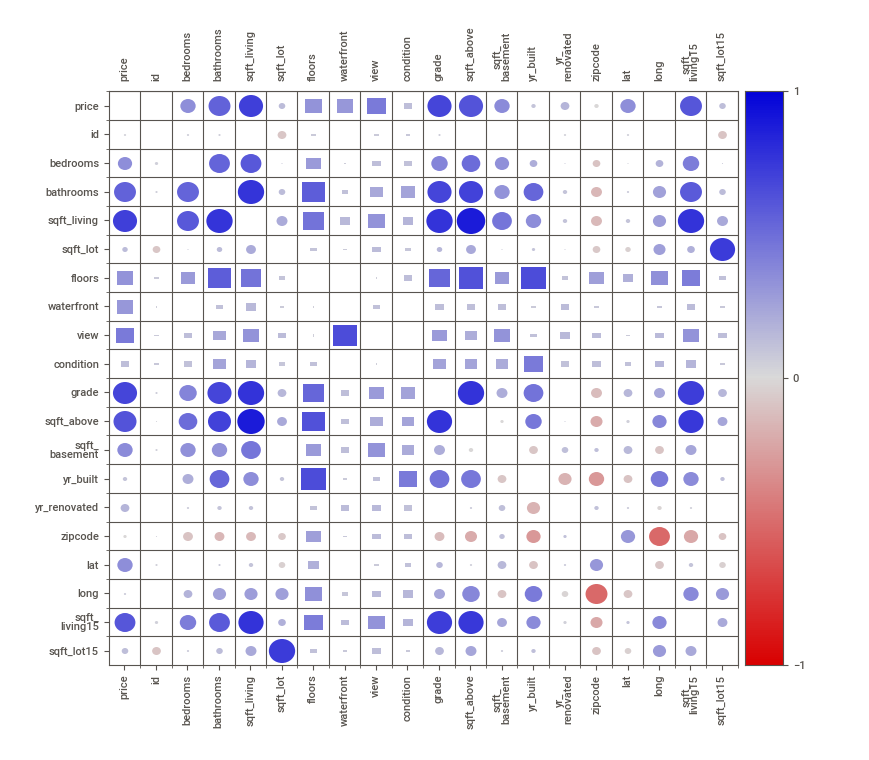
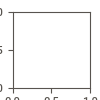

In [45]:
# generate viz report
viz_report = sv.analyze(df, target_feat='price')
viz_report.show_notebook()

In [46]:
# generate a few scatter plots

for col in ['sqft_living', 'sqft_lot','bathrooms', 'yr_built']:
    p.generate_scatter_plot(
        df,
        col,
        'price'
    )

### Correlation matrices for all variables.

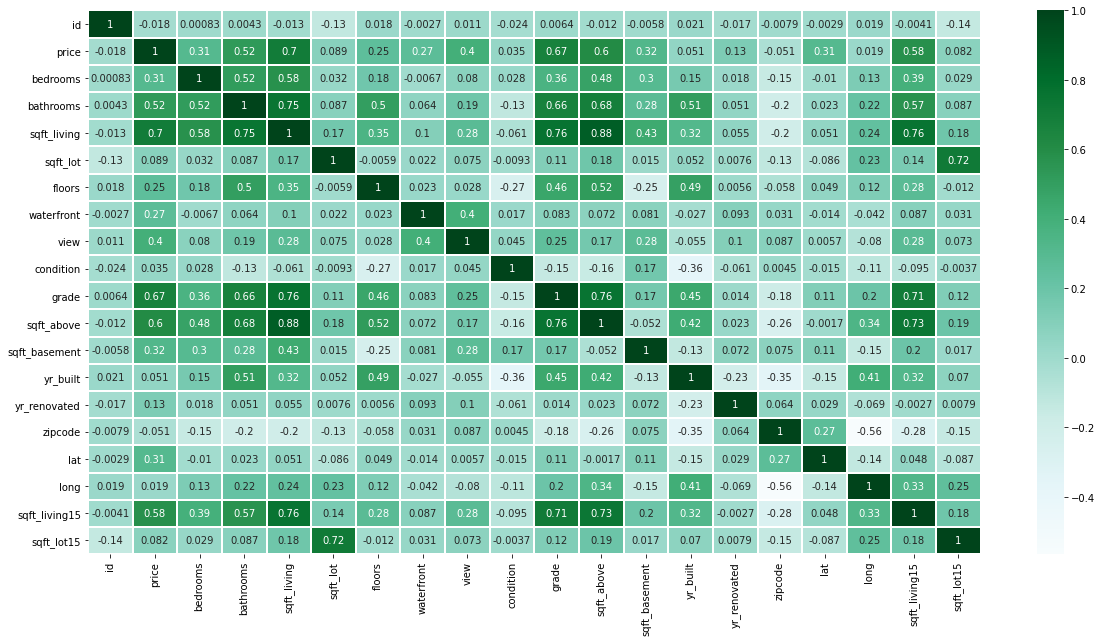

In [13]:
p.generate_corr_matrix_plot(df)

#### There are few good correlations with price jumping right at us like `sqft_living`, `grade`, `bathrooms`, `bedroom` etc.

There is a strong correlation between `sqft_living` and `sqft_living15' and `sqft_above` and we could just keep `sqft_living` for now for representation. Also, `sqft_lot` has strong correlation with `sqft_lot15` and we could just keep one.

### Zoomed correlation matrices for select few variables.

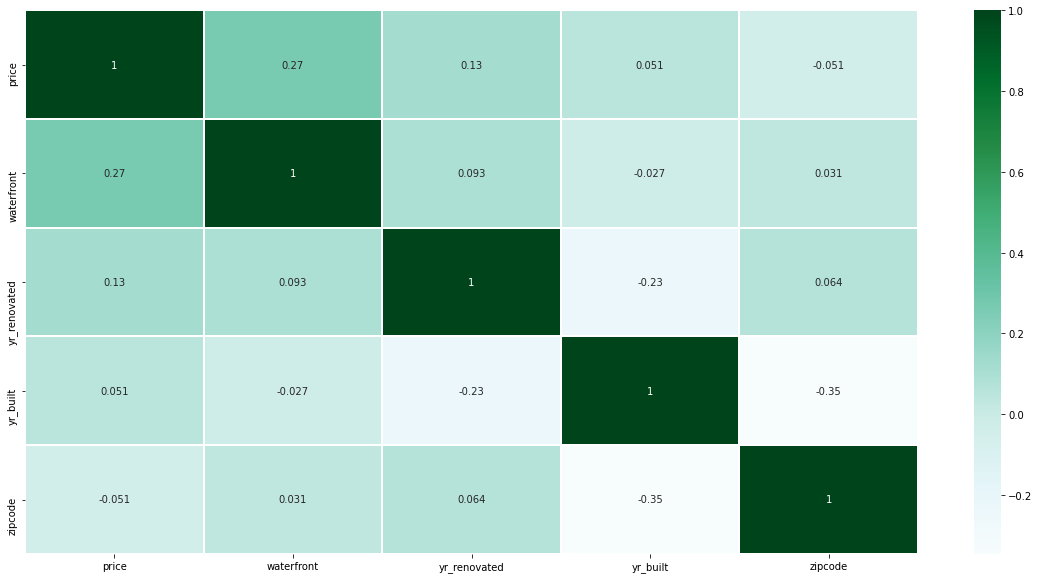

In [14]:
p.generate_corr_matrix_plot(df[['price', 'waterfront', 'yr_renovated', 'yr_built', 'zipcode']])

#### There isn't a strong correlation between price and yr_built, yr_renovated & zipcode. Maybe we could experiment with some feature engineering with those variables.